Bivariate Gaussian distribution (i.e., two correlated variables) and sample from it using Gibbs Sampling.

In [14]:
import numpy as np 

import matplotlib.pyplot as plt

In [15]:
# Define the parameters of the bivariate Gaussian

def gibbs_sampling(mu_x = 0, mu_y =0,sigma_x = 1, sigma_y =1, rho=0.8, num_samples=1000, burn_in=100):

    samples=[]

    x,y =0, 0  # Initial values

    for _ in range(num_samples + burn_in):

        # Sample x from p(x | y)

        x = np.random.normal(mu_x + rho * (sigma_x / sigma_y ) * (y - mu_y),  np.sqrt((1 - rho**2) * sigma_x **2))

        # Sample y from p(y | x)

        y = np.random.normal( mu_y + rho * (sigma_y / sigma_x) * (x - mu_x), np.sqrt((1 - rho**2) * sigma_y**2))

        if _ >= burn_in:

            samples.append((x,y))
    
    return np.array(samples)



In [16]:
# Generate samples

samples = gibbs_sampling()

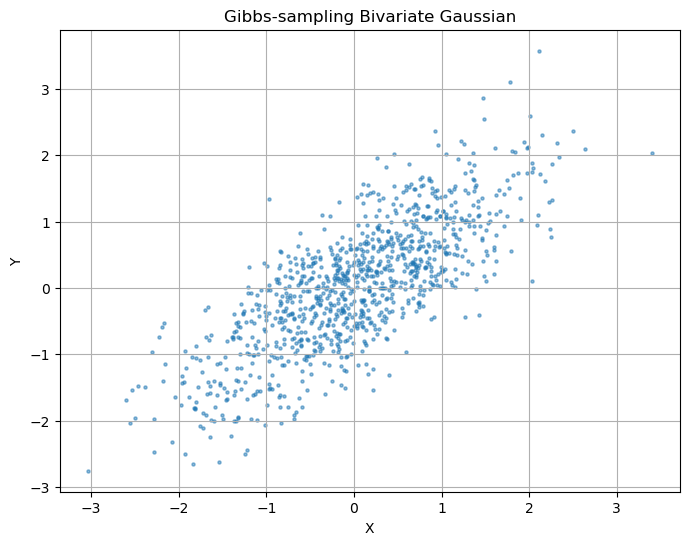

In [17]:
# Plot the results

plt.figure(figsize=(8,6))

plt.scatter(samples[:,0], samples[:,1], alpha=0.5, s=5)

plt.title('Gibbs-sampling Bivariate Gaussian')

plt.xlabel('X')

plt.ylabel('Y')

plt.grid()

plt.show()